# Médias móveis Belo Jardim - PE (7-7 dias)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [4]:
df = pd.read_excel('bd_belojardim.xlsx', sheet_name='covid', usecols=['data','casosNovos']) #lendo apenas coluna de data e casos
df.set_index('data', inplace=True) #definindo coluna de datas como indice 
display(df)

,casosNovos
data,
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,1
2022-01-05,4
...,...
2023-01-31,0
2023-02-01,3
2023-02-02,0


In [5]:
media_moveis = df['casosNovos'].rolling(window=7).mean() #usando função de media a cada 7 linhas 

df['media_moveis'] = media_moveis # Adicione a coluna de média móvel ao DataFrame

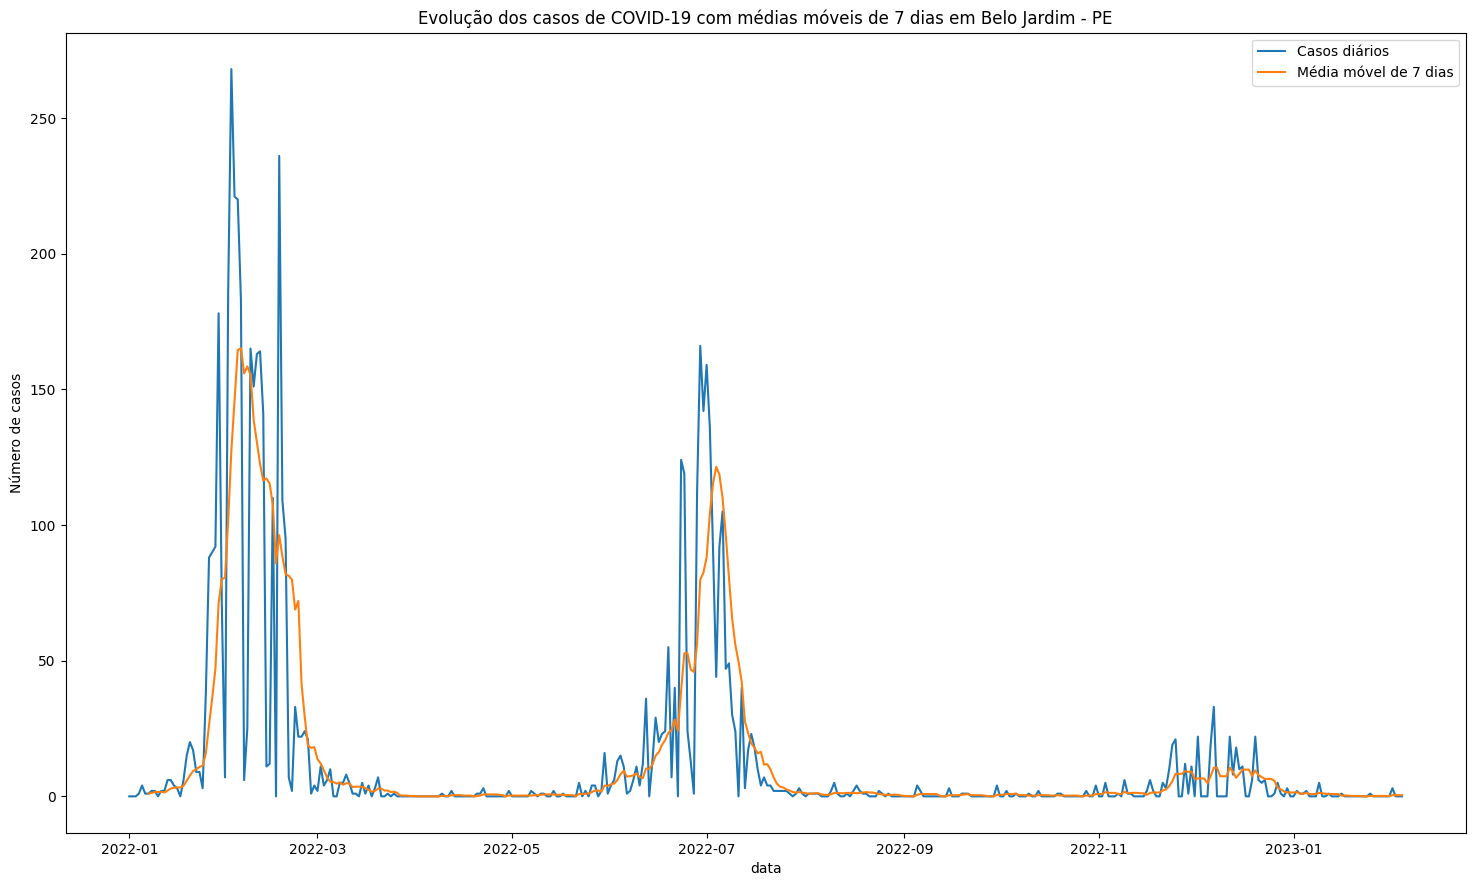

In [6]:
fig = plt.figure(figsize = (14, 8)) #estilizando gráfico
ax = fig.add_axes([0, 0, 1, 1]) #estilizando altura e largura gráfico

# Plot the data
ax.plot(df.index, df['casosNovos'], label='Casos diários', )
ax.plot(df.index, df['media_moveis'], label='Média móvel de 7 dias')

plt.title('Evolução dos casos de COVID-19 com médias móveis de 7 dias em Belo Jardim - PE')
plt.xlabel('data')
plt.ylabel('Número de casos')

plt.legend()


plt.show() #mostra gráfico

# Mínimos quadrados Belo Jardim - PE  |     ajustado em     y(t) = a0 + a1t + a2t²

In [7]:
dados = pd.read_excel('bd_belojardim.xlsx')
varx = dados['index'].values
vary = dados['casosAcumulado'].values
dates = dados['data']
dadosplanilha = []

In [8]:

for z in range(len(varx)-20):  #calculando de 21 em 21 dias 
    y2 = vary[z:21+z]
    x2 = varx[z:21+z]    
    xdate = dates[z].to_pydatetime() #Convertendo de timestamp para date
    xdate2 = dates[21+z].to_pydatetime() #Convertendo de timestamp para date
        
    df = pd.DataFrame({'x': x2, 'y': y2})

    # Adicionar colunas para x^2 e 1
    df['x2'] = df['x']**2
    df['ones'] = np.ones(len(df))

    # Criar a matriz X e o vetor y
    X = df[['x2', 'x', 'ones']].values
    y = df['y'].values

    # Calcular a solução para os coeficientes do ajuste quadrático usando o método dos mínimos quadrados
    a, b, c = np.linalg.lstsq(X, y, rcond=None)[0]

    # Armazenar os resultados nas variáveis 
    a_result = a
    b_result = b
    c_result = c
    
       
    dadosi = []
    yi = []
    for r in range(len(x2)):  #fazendo o loop do tamanho dos vetores
        y3 = y2[r]  
        x3 = x2[r] 
        func = round(a,4)*pow((x3),2)+round(b,4)*(x3)+round(c,4)  # calcular a previsão
        
        dadosi.append(func)
        yi.append(y3)
    

    erro_quadratico = mean_squared_error(yi, dadosi, squared=False)  #se false retorna o RMSE
    erro_relativo =  mean_absolute_error(yi,dadosi)
    #  print(dadosi)
    # print(yi)
    # print(round(erro_quadratico,4))
        
    func = round(a,4)*pow((22+z),2)+round(b,4)*(22+z)+round(c,4)  # calcular a previsão
    
    print(z+1, xdate2.date(), round(a_result,4),"x² ",round(b,4),"x ",round(c,4),'|| previsão',22+z,':', round(func,4), ' || RMSE: ', round(erro_quadratico,4), "|| Erro_Rel", round(erro_relativo,4))            
    
    dadosplanilha.append({'data': xdate2.date(),'a0.pol': round(c,4), 'a1.pol': round(b,4), 'a2.pol': round(a,4), 'Erro.pol':round(erro_quadratico,4), 'Previsao':round(func,4),'erro.previsao':round(erro_relativo,4)})
 


1 2022-01-22 0.287 x²  -2.682 x  4681.4481 || previsão 22 : 4761.3521  || RMSE:  5.7372 || Erro_Rel 4.2907
2 2022-01-23 0.3445 x²  -3.9586 x  4687.2562 || previsão 23 : 4778.4489  || RMSE:  5.9875 || Erro_Rel 4.8207
3 2022-01-24 0.3854 x²  -5.0452 x  4693.5608 || previsão 24 : 4794.4664  || RMSE:  5.7456 || Erro_Rel 4.6259
4 2022-01-25 0.394 x²  -5.4955 x  4697.8863 || previsão 25 : 4806.7488  || RMSE:  5.5686 || Erro_Rel 4.4644
5 2022-01-26 0.4726 x²  -7.7204 x  4711.8971 || previsão 26 : 4830.6443  || RMSE:  5.9722 || Erro_Rel 4.8002
6 2022-01-27 0.7281 x²  -14.9122 x  4756.4212 || previsão 27 : 4884.5767  || RMSE:  15.2945 || Erro_Rel 10.2869
7 2022-01-28 1.1119 x²  -26.6141 x  4836.6002 || previsão 28 : 4963.135  || RMSE:  25.1049 || Erro_Rel 17.3929
8 2022-01-29 1.5736 x²  -41.8596 x  4951.9447 || previsão 29 : 5061.4139  || RMSE:  32.8522 || Erro_Rel 24.6767
9 2022-01-30 2.3018 x²  -67.28 x  5157.0802 || previsão 30 : 5210.3002  || RMSE:  47.5846 || Erro_Rel 36.7973
10 2022-01-31

91 2022-04-22 0.0054 x²  -0.8415 x  8064.4866 || previsão 112 : 8037.9762  || RMSE:  0.5496 || Erro_Rel 0.456
92 2022-04-23 0.0126 x²  -2.2562 x  8134.1386 || previsão 113 : 8040.0774  || RMSE:  0.903 || Erro_Rel 0.7687
93 2022-04-24 0.0162 x²  -2.9754 x  8169.9903 || previsão 114 : 8041.3299  || RMSE:  0.9635 || Erro_Rel 0.8136
94 2022-04-25 0.0169 x²  -3.1258 x  8177.5896 || previsão 115 : 8041.6251  || RMSE:  0.8205 || Erro_Rel 0.6472
95 2022-04-26 0.0155 x²  -2.8403 x  8163.0378 || previsão 116 : 8042.131  || RMSE:  0.8245 || Erro_Rel 0.6613
96 2022-04-27 0.0099 x²  -1.6717 x  8102.7143 || previsão 117 : 8042.6465  || RMSE:  1.0555 || Erro_Rel 0.8858
97 2022-04-28 0.0043 x²  -0.5181 x  8042.5102 || previsão 118 : 8041.2476  || RMSE:  1.0663 || Erro_Rel 0.8044
98 2022-04-29 -0.0004 x²  0.4847 x  7989.7615 || previsão 119 : 8041.7764  || RMSE:  1.0364 || Erro_Rel 0.8919
99 2022-04-30 -0.0038 x²  1.1962 x  7952.3477 || previsão 120 : 8041.1717  || RMSE:  1.0616 || Erro_Rel 0.844
100 2

192 2022-08-01 -0.5527 x²  229.1477 x  -13710.2009 || previsão 213 : 10022.8129  || RMSE:  7.7333 || Erro_Rel 6.6319
193 2022-08-02 -0.4387 x²  182.8564 x  -9012.2003 || previsão 214 : 10028.3641  || RMSE:  6.7578 || Erro_Rel 5.8657
194 2022-08-03 -0.3886 x²  162.5488 x  -6956.9177 || previsão 215 : 10028.0393  || RMSE:  6.9819 || Erro_Rel 5.9535
195 2022-08-04 -0.292 x²  122.9252 x  -2893.9832 || previsão 216 : 10034.308  || RMSE:  6.2123 || Erro_Rel 4.9876
196 2022-08-05 -0.1961 x²  83.2797 x  1198.5929 || previsão 217 : 10036.1349  || RMSE:  3.8175 || Erro_Rel 2.8499
197 2022-08-06 -0.1322 x²  56.7519 x  3950.5771 || previsão 218 : 10039.8185  || RMSE:  2.1891 || Erro_Rel 1.6755
198 2022-08-07 -0.1009 x²  43.6945 x  5311.2695 || previsão 219 : 10041.1001  || RMSE:  1.7803 || Erro_Rel 1.5313
199 2022-08-08 -0.0846 x²  36.8582 x  6027.01 || previsão 220 : 10041.174  || RMSE:  2.0706 || Erro_Rel 1.8474
200 2022-08-09 -0.0666 x²  29.2579 x  6829.0901 || previsão 221 : 10042.2754  || RMS

278 2022-10-26 -0.006 x²  3.7628 x  9500.5717 || previsão 299 : 10089.2429  || RMSE:  2.2471 || Erro_Rel 2.1973
279 2022-10-27 -0.0078 x²  4.8116 x  9350.1349 || previsão 300 : 10091.6149  || RMSE:  0.4799 || Erro_Rel 0.4043
280 2022-10-28 -0.0118 x²  7.124 x  9014.5554 || previsão 301 : 10089.7876  || RMSE:  1.4623 || Erro_Rel 1.3925
281 2022-10-29 -0.009 x²  5.5369 x  9241.0634 || previsão 302 : 10092.3712  || RMSE:  0.6695 || Erro_Rel 0.5786
282 2022-10-30 -0.0064 x²  4.0076 x  9462.0315 || previsão 303 : 10088.7567  || RMSE:  3.4836 || Erro_Rel 3.4355
283 2022-10-31 -0.0032 x²  2.1714 x  9730.8237 || previsão 304 : 10095.1981  || RMSE:  2.1874 || Erro_Rel 2.1145
284 2022-11-01 0.0086 x²  -4.7054 x  10733.8405 || previsão 305 : 10098.7085  || RMSE:  3.6618 || Erro_Rel 3.5464
285 2022-11-02 0.0177 x²  -10.0642 x  11521.8069 || previsão 306 : 10099.5189  || RMSE:  2.965 || Erro_Rel 2.8118
286 2022-11-03 0.025 x²  -14.4168 x  12168.1722 || previsão 307 : 10098.4396  || RMSE:  1.0205 ||

367 2023-01-23 -0.0409 x²  31.3718 x  4392.9273 || previsão 388 : 10407.9361  || RMSE:  5.3076 || Erro_Rel 5.2418
368 2023-01-24 -0.0411 x²  31.5307 x  4360.4628 || previsão 389 : 10406.612  || RMSE:  6.3137 || Erro_Rel 6.2577
369 2023-01-25 -0.0398 x²  30.5866 x  4536.8321 || previsão 390 : 10412.0261  || RMSE:  1.2806 || Erro_Rel 1.138
370 2023-01-26 -0.0343 x²  26.4332 x  5321.1094 || previsão 391 : 10412.6723  || RMSE:  1.1275 || Erro_Rel 0.9053
371 2023-01-27 -0.0321 x²  24.8097 x  5624.7077 || previsão 392 : 10417.4957  || RMSE:  3.8541 || Erro_Rel 3.7393
372 2023-01-28 -0.0269 x²  20.8512 x  6377.8222 || previsão 393 : 10417.6657  || RMSE:  3.7636 || Erro_Rel 3.6387
373 2023-01-29 -0.018 x²  13.9933 x  7692.0529 || previsão 394 : 10411.1651  || RMSE:  3.085 || Erro_Rel 2.9782
374 2023-01-30 -0.0046 x²  3.6655 x  9681.2245 || previsão 395 : 10411.382  || RMSE:  3.4662 || Erro_Rel 3.4517
375 2023-01-31 -0.0048 x²  3.8372 x  9648.1677 || previsão 396 : 10414.9821  || RMSE:  0.3062 

KeyError: 400

In [142]:
#criar arquivo para armazenar os dados igual a planilha de enunciado do trabalho
casa = pd.DataFrame(dadosplanilha, index=range(1, len( dadosplanilha)+1))
casa.to_excel('dados.xlsx', index=False, sheet_name='Dados')

# As três melhores previsões

In [305]:
#função para calcular o mmc para as melhores e piores previsões
def calcular_coef(x2, y2):    
    df = pd.DataFrame({'x': x2, 'y': y2})
    # Adicionar colunas para x^2 e 1
    df['x2'] = df['x']**2
    df['ones'] = np.ones(len(df))
    # Criar a matriz X e o vetor y
    X = df[['x2', 'x', 'ones']].values
    y = df['y'].values
    # Calcular a solução para os coeficientes do ajuste quadrático usando o método dos mínimos quadrados
    a, b, c = np.linalg.lstsq(X, y, rcond=None)[0]
    # Armazenar os resultados nas variáveis 
    a_result = a
    b_result = b
    c_result = c
    
    dadosi = []
    yi = []
    for r in range(len(x2)):  #fazendo o loop do tamanho dos vetores
        y3 = y2[r]  
        x3 = x2[r] 
        func = round(a,4)*pow((x3),2)+round(b,4)*(x3)+round(c,4)  # calcular a previsão
        
        dadosi.append(func)
        yi.append(y3)
   

    ultimo_index = len(x2) - 1    
    ultimovalor = x2[ultimo_index]+1
    
    func_prox_dia = round(a,4)*pow((ultimovalor),2)+round(b,4)*(ultimovalor)+round(c,4)  #previsao proximo dia
    
    
    valor_estimado = [ultimovalor, func_prox_dia]
    
    
    
    return dadosi, ultimovalor,  func_prox_dia

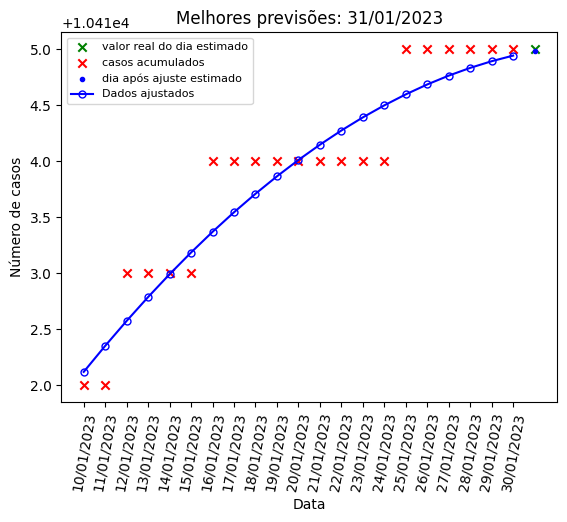

In [279]:
dados['data'] = pd.to_datetime(dados['data'])
dados['data_formatada'] = dados['data'].dt.strftime('%d/%m/%Y')
dataconvertida = dados['data_formatada']    
xdate2 = dataconvertida[374:395]

g1x = varx[374:395]
g1y = vary[374:395]
g1 = calcular_coef(g1x,g1y)

dadosi, ultimovalor,  func_prox_dia = calcular_coef(g1x,g1y)

plt.scatter(varx[395], vary[395], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(g1x,g1y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color='b', marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(g1x, dadosi,color='b', marker='.', markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(g1x,  xdate2, rotation=80)

plt.title('Melhores previsões: 31/01/2023')
plt.xlabel('Data')
plt.ylabel('Número de casos')
plt.legend(prop={'size': 8})

plt.show()

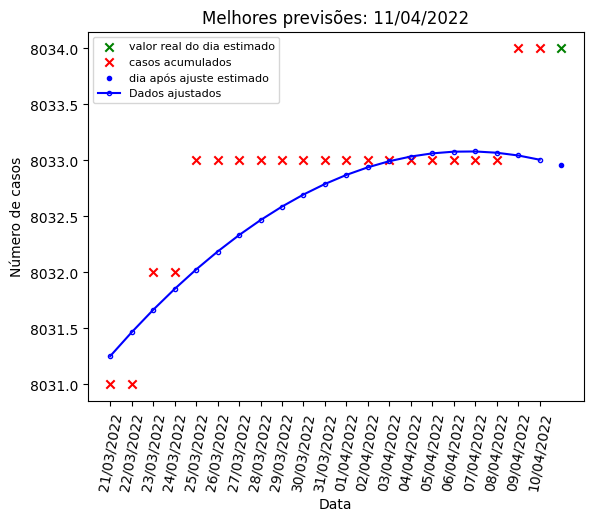

In [285]:
xdate2 = dataconvertida[79:100]

g2x = varx[79:100]
g2y = vary[79:100]
g2 = calcular_coef(g2x,g2y)


dadosi, ultimovalor,  func_prox_dia = calcular_coef(g2x,g2y)

plt.scatter(varx[100], vary[100], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(g2x,g2y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(g2x, dadosi,color='b', marker='.', linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(g2x,  xdate2, rotation=80)

plt.title('Melhores previsões: 11/04/2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()

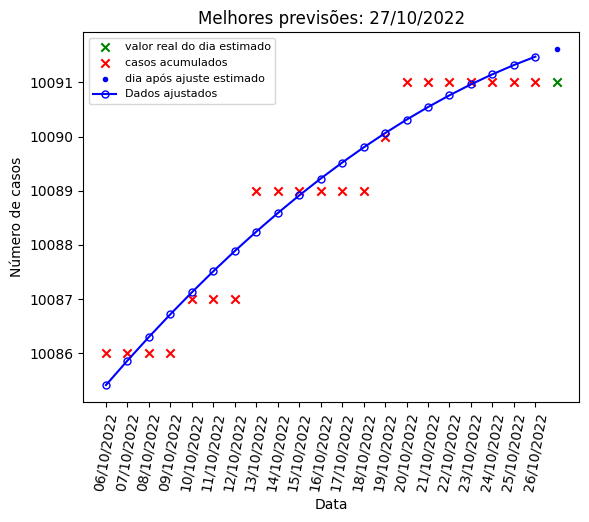

In [286]:
xdate2 = dataconvertida[278:299]


g3x = varx[278:299]
g3y = vary[278:299]
g3 = calcular_coef(g3x,g3y)

dadosi, ultimovalor,  func_prox_dia = calcular_coef(g3x,g3y)

plt.scatter(varx[299], vary[299], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(g3x,g3y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(g3x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(g3x,  xdate2, rotation=80)

plt.title('Melhores previsões: 27/10/2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()

# As três piores previsões

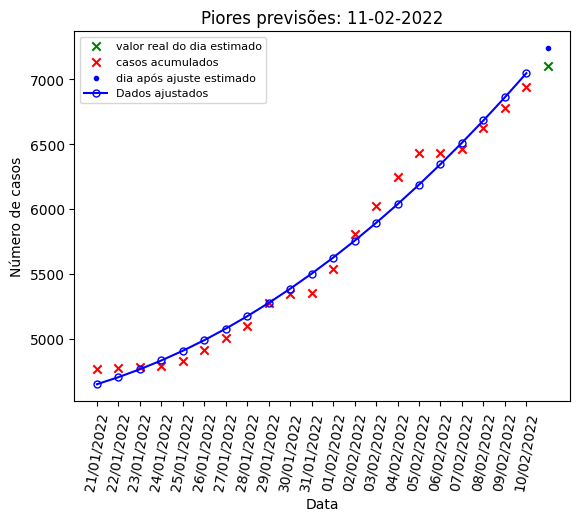

In [294]:
xdate2 = dataconvertida[20:41]

b1x = varx[20:41]
b1y = vary[20:41]
b1 = calcular_coef(b1x, b1y)

dadosi, ultimovalor,  func_prox_dia = calcular_coef(b1x, b1y)

plt.scatter(varx[41], vary[41], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(b1x,b1y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(b1x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(b1x,  xdate2, rotation=80)

plt.title('Piores previsões: 11-02-2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()


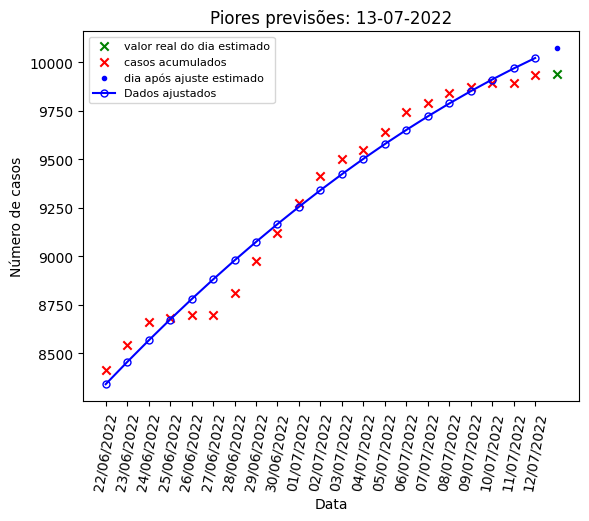

In [299]:
xdate2 = dataconvertida[172:193]

b2x = varx[172:193]
b2y = vary[172:193]
b2 = calcular_coef(b2x, b2y)


dadosi, ultimovalor,  func_prox_dia = calcular_coef(b2x, b2y)

plt.scatter(varx[193], vary[193], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(b2x,b2y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(b2x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(b2x,  xdate2, rotation=80)

plt.title('Piores previsões: 13-07-2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()


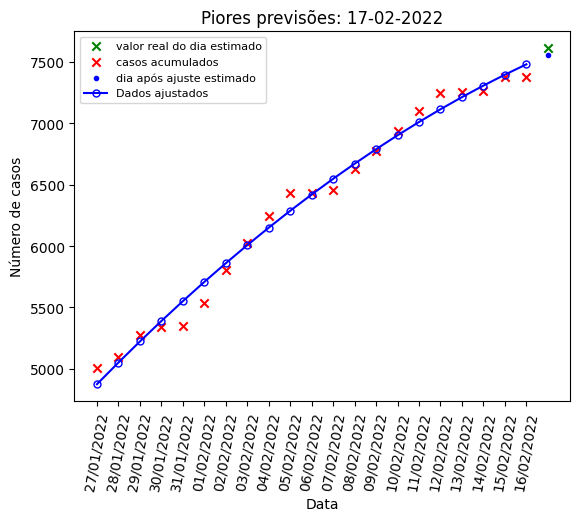

In [304]:
xdate2 = dataconvertida[26:47]

b3x = varx[26:47]
b3y = vary[26:47]
calcular_coef(b3x, b3y)

dadosi, ultimovalor,  func_prox_dia = calcular_coef(b3x, b3y)

plt.scatter(varx[47], vary[47], color=['green'], marker='x', label='valor real do dia estimado')
plt.scatter(b3x,b3y , color=['red'], marker='x', label='casos acumulados')
plt.scatter(ultimovalor,func_prox_dia , color=['blue'], marker='.', label='dia após ajuste estimado') #ponto estimado
plt.plot(b3x, dadosi,color='b', marker='.',  markersize=10, linestyle='solid', mfc='none', mec='b', label='Dados ajustados'); #ajustando dados de X na nova função

plt.xticks(b3x,  xdate2, rotation=80)

plt.title('Piores previsões: 17-02-2022')
plt.xlabel('Data')
plt.ylabel('Número de casos')

plt.legend(prop={'size': 8})
plt.show()

